<a href="https://colab.research.google.com/github/anggisotomani/Sentiment-Analysis/blob/main/Ride_Hailing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Packages and Import Library**

In [1]:
# Install packages
!pip install sastrawi
!pip install gensim
!pip install nltk
!pip install wordcloud
!pip install tensorflow
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_ver

In [1]:
# Import libraries
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
import datetime as dt
import re
import string
from io import StringIO
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# NLP libraries
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
from gensim.models import Word2Vec
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer

# ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scipy import sparse

# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Loading Dataset**

In [2]:
# Download dataset dari GitHub
!wget -O dataset.csv "https://raw.githubusercontent.com/anggisotomani/Dataset/refs/heads/main/Ridehailing_Dataset.csv"

--2025-06-06 17:17:50--  https://raw.githubusercontent.com/anggisotomani/Dataset/refs/heads/main/Ridehailing_Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19870087 (19M) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  18.95M  98.7MB/s    in 0.2s    

2025-06-06 17:17:50 (98.7 MB/s) - ‘dataset.csv’ saved [19870087/19870087]



In [3]:
df = pd.read_csv('/content/dataset.csv')
df

userName  score                   at  \
0         Pengguna Google      1  2025-05-30 17:59:43   
1         Pengguna Google      5  2025-05-30 17:20:36   
2         Pengguna Google      3  2025-05-30 16:41:04   
3         Pengguna Google      5  2025-05-30 16:07:27   
4         Pengguna Google      4  2025-05-30 15:54:02   
...                   ...    ...                  ...   
199995         Erwin Said      5  2024-12-09 00:52:12   
199996        Dim Dimyati      5  2024-12-09 00:42:03   
199997         Basa Riyan      5  2024-12-09 00:36:58   
199998         Rizal Eddy      5  2024-12-09 00:27:12   
199999  arif rahman soleh      5  2024-12-09 00:23:27   

                                                  content  appName  
0                                useless aplication...lol  inDrive  
1                                           sangat bagus,  inDrive  
2       Kenapa saya di bisa login ke aplikasi ini ya,P...  inDrive  
3                                                     oke  inDrive  
4       sy cb ubah kendaraan udh proses bbrpa hri hsil...  inDrive  
...                                                   ...      ...  
199995                        pelayanan nya semakin baik.    Maxim  
199996                                             Mantap    Maxim  
199997  Order telah dipenuhi oleh: Angga Saputra denga...    Maxim  
199998                                             mantap    Maxim  
199999                             terimaksih mas driver.    Maxim  

[200000 rows x 5 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   userName  200000 non-null  object
 1   score     200000 non-null  int64 
 2   at        200000 non-null  object
 3   content   199999 non-null  object
 4   appName   200000 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.6+ MB


# **Preprocessing Text**

In [5]:
clean_df = df.dropna()

In [6]:
clean_df = clean_df.drop_duplicates()
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [7]:
clean_df.drop(['userName', 'score', 'at'], axis=1, inplace=True)

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199998 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  199998 non-null  object
 1   appName  199998 non-null  object
dtypes: object(2)
memory usage: 4.6+ MB


In [9]:
#Cleaning
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = re.sub(r'[^\x00-\x7F]+', '', text) # menghapus karakter non-ASCII (termasuk emoji)
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

#Casefolding
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

#Normalization
def load_slangwords(url):
    response = requests.get(url)
    response.raise_for_status()
    slang_dict = response.json()
    return slang_dict

# URL kamus slang
url_slang = "https://raw.githubusercontent.com/anggisotomani/Kamus/refs/heads/main/slangwords"

slangwords = load_slangwords(url_slang)
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

#Tokenizing
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

#Stopwords Removal
def filteringText(text):
    # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa', 'yaaa', 'yah', 'nya','na', 'b', 'pa', 'dri', 'ny',
                          'dr', 'utk', 'deh', 'sih', 'wkwk', 'ku','di', 'ya', 'yg', 'yng',
                          'loh','kah', 'si', 'sih', 'dgn', 'X', 'woi','woii','woy'])

    # Kata-kata yang perlu dipertahankan untuk sentiment analysis
    keep_stopwords = {
        'tidak', 'bukan', 'jangan', 'sekali', 'banget', 'paling',
        'cukup', 'lumayan', 'sedikit', 'terlalu', 'begitu', 'tepat', 'siap',
        'baik', 'jelas', 'penting', 'pantas', 'layak', 'cocok', 'pas'
    }

    # Hapus kata-kata yang perlu dipertahankan dari daftar stopwords
    filtered_stopwords = listStopwords - keep_stopwords

    # Filter teks
    filtered = []
    for txt in text:
        if txt not in filtered_stopwords:
            filtered.append(txt)

    text = filtered
    return text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [10]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_final'] = clean_df['text_stopword'].apply(toSentence)

# Tampilkan
clean_df.head(6)

content  appName  \
0                           useless aplication...lol  inDrive   
1                                      sangat bagus,  inDrive   
2  Kenapa saya di bisa login ke aplikasi ini ya,P...  inDrive   
3                                                oke  inDrive   
4  sy cb ubah kendaraan udh proses bbrpa hri hsil...  inDrive   
5                                            terbaik  inDrive   

                                          text_clean  \
0                              useless aplicationlol   
1                                       sangat bagus   
2  Kenapa saya di bisa login ke aplikasi ini yaPa...   
3                                                oke   
4  sy cb ubah kendaraan udh proses bbrpa hri hsil...   
5                                            terbaik   

                                text_casefoldingText  \
0                              useless aplicationlol   
1                                       sangat bagus   
2  kenapa saya di bisa login ke aplikasi ini yapa...   
3                                                oke   
4  sy cb ubah kendaraan udh proses bbrpa hri hsil...   
5                                            terbaik   

                                     text_slangwords  \
0                       tidak berguna aplikasi tolol   
1                                       sangat bagus   
2  kenapa saya di bisa login ke aplikasi ini ya p...   
3                                                oke   
4  saya coba ubah kendaraan sudah proses beberapa...   
5                                            terbaik   

                                 text_tokenizingText  \
0                  [tidak, berguna, aplikasi, tolol]   
1                                    [sangat, bagus]   
2  [kenapa, saya, di, bisa, login, ke, aplikasi, ...   
3                                              [oke]   
4  [saya, coba, ubah, kendaraan, sudah, proses, b...   
5                                          [terbaik]   

                                       text_stopword  \
0                  [tidak, berguna, aplikasi, tolol]   
1                                            [bagus]   
2  [login, aplikasi, hp, ram, masuk, aplikasi, ti...   
3                                              [oke]   
4  [coba, ubah, kendaraan, proses, ,, hasil, tola...   
5                                          [terbaik]   

                                          text_final  
0                       tidak berguna aplikasi tolol  
1                                              bagus  
2         login aplikasi hp ram masuk aplikasi tidak  
3                                                oke  
4  coba ubah kendaraan proses , hasil tolak sesua...  
5                                            terbaik

# **Labeling**

In [11]:
# Membuat dictionary kosong untuk menyimpan kata-kata positif beserta nilai intensitasnya
lexicon_positive = dict()

# Mengambil data lexicon positif dari URL
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

# Mengecek apakah permintaan HTTP berhasil (status code 200)
if response.status_code == 200:
    # Membaca data CSV dari respons teks menggunakan csv.reader
    reader = csv.reader(StringIO(response.text), delimiter=',')

    # Memasukkan setiap baris data ke dalam dictionary lexicon_positive
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])  # row[0]: kata, row[1]: nilai intensitas
else:
    # Menampilkan pesan kesalahan jika gagal mengambil data
    print("Failed to fetch positive lexicon data")

# Membuat dictionary kosong untuk menyimpan kata-kata negatif beserta nilai intensitasnya
lexicon_negative = dict()

# Mengambil data lexicon negatif dari URL
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

# Mengecek apakah permintaan HTTP berhasil (status code 200)
if response.status_code == 200:
    # Membaca data CSV dari respons teks menggunakan csv.reader
    reader = csv.reader(StringIO(response.text), delimiter=',')

    # Memasukkan setiap baris data ke dalam dictionary lexicon_negative
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])  # row[0]: kata, row[1]: nilai intensitas
else:
    # Menampilkan pesan kesalahan jika gagal mengambil data
    print("Failed to fetch negative lexicon data")

In [12]:
def sentiment_analysis_lexicon_indonesia(text):
    # Inisialisasi variabel skor untuk menghitung nilai sentimen
    score = 0
    # Menghitung skor
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [13]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    133508
negative     44495
neutral      21995
Name: count, dtype: int64


In [14]:
clean_df.head(6)

content  appName  \
0                           useless aplication...lol  inDrive   
1                                      sangat bagus,  inDrive   
2  Kenapa saya di bisa login ke aplikasi ini ya,P...  inDrive   
3                                                oke  inDrive   
4  sy cb ubah kendaraan udh proses bbrpa hri hsil...  inDrive   
5                                            terbaik  inDrive   

                                          text_clean  \
0                              useless aplicationlol   
1                                       sangat bagus   
2  Kenapa saya di bisa login ke aplikasi ini yaPa...   
3                                                oke   
4  sy cb ubah kendaraan udh proses bbrpa hri hsil...   
5                                            terbaik   

                                text_casefoldingText  \
0                              useless aplicationlol   
1                                       sangat bagus   
2  kenapa saya di bisa login ke aplikasi ini yapa...   
3                                                oke   
4  sy cb ubah kendaraan udh proses bbrpa hri hsil...   
5                                            terbaik   

                                     text_slangwords  \
0                       tidak berguna aplikasi tolol   
1                                       sangat bagus   
2  kenapa saya di bisa login ke aplikasi ini ya p...   
3                                                oke   
4  saya coba ubah kendaraan sudah proses beberapa...   
5                                            terbaik   

                                 text_tokenizingText  \
0                  [tidak, berguna, aplikasi, tolol]   
1                                    [sangat, bagus]   
2  [kenapa, saya, di, bisa, login, ke, aplikasi, ...   
3                                              [oke]   
4  [saya, coba, ubah, kendaraan, sudah, proses, b...   
5                                          [terbaik]   

                                       text_stopword  \
0                  [tidak, berguna, aplikasi, tolol]   
1                                            [bagus]   
2  [login, aplikasi, hp, ram, masuk, aplikasi, ti...   
3                                              [oke]   
4  [coba, ubah, kendaraan, proses, ,, hasil, tola...   
5                                          [terbaik]   

                                          text_final  polarity_score  polarity  
0                       tidak berguna aplikasi tolol              -9  negative  
1                                              bagus               2  positive  
2         login aplikasi hp ram masuk aplikasi tidak             -16  negative  
3                                                oke               2  positive  
4  coba ubah kendaraan proses , hasil tolak sesua...               5  positive  
5                                            terbaik               5  positive

# **DATA SPLIT DAN EKSTRAKSI FITUR MENGGUNAKAN Word2Vec DAN TF-IDF**

# **Split Data**

In [15]:
# Memisahkan fitur teks dan mengubah label sentimen menjadi format numerik
X = clean_df['text_final']
y = clean_df['polarity'].apply(lambda x: 1 if x == 'positive' else (0 if x == 'neutral' else -1))

In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

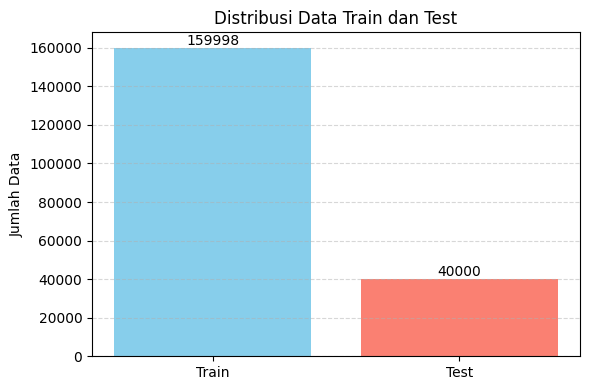

In [17]:
# Hitung jumlah data
train_len = len(y_train)
test_len = len(y_test)

# Label dan jumlah
data_split = [train_len, test_len]
labels = ['Train', 'Test']

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, data_split, color=['skyblue', 'salmon'])
plt.title('Distribusi Data Train dan Test')
plt.ylabel('Jumlah Data')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Tambahkan jumlah di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# **TF-IDF dan Word2vec**

In [18]:
# TF-IDF Feature Extraction
tfidf = TfidfVectorizer(max_features=1300, min_df=17, max_df=0.8)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())
features_df.head()

abal  abang  abangnya   ac  adakan  adil  admin   ah   ai  ajak  ...  \
0   0.0    0.0       0.0  0.0     0.0   0.0    0.0  0.0  0.0   0.0  ...   
1   0.0    0.0       0.0  0.0     0.0   0.0    0.0  0.0  0.0   0.0  ...   
2   0.0    0.0       0.0  0.0     0.0   0.0    0.0  0.0  0.0   0.0  ...   
3   0.0    0.0       0.0  0.0     0.0   0.0    0.0  0.0  0.0   0.0  ...   
4   0.0    0.0       0.0  0.0     0.0   0.0    0.0  0.0  0.0   0.0  ...   

   wangi  warna  whatsapp  wifi  wilayah  worth  wow   xl  zaman  zona  
0    0.0    0.0       0.0   0.0      0.0    0.0  0.0  0.0    0.0   0.0  
1    0.0    0.0       0.0   0.0      0.0    0.0  0.0  0.0    0.0   0.0  
2    0.0    0.0       0.0   0.0      0.0    0.0  0.0  0.0    0.0   0.0  
3    0.0    0.0       0.0   0.0      0.0    0.0  0.0  0.0    0.0   0.0  
4    0.0    0.0       0.0   0.0      0.0    0.0  0.0  0.0    0.0   0.0  

[5 rows x 1300 columns]

In [19]:
# Tampilkan kata dengan bobot TF-IDF tertinggi
topword = features_df.iloc[0].sort_values(ascending=False).head(6)
print(topword)

tombol         0.446518
pertahankan    0.428580
gampang        0.402883
otomatis       0.356636
mencari        0.337146
penumpang      0.285975
Name: 0, dtype: float64


In [20]:
# Tampilkan vocabulary
print("Vocabulary TFIDF:")
for i, (word, index) in enumerate(tfidf.vocabulary_.items()):
    if i >= 10:
        break
    print(f"{word}: {index}")

Vocabulary TFIDF:
kasih: 473
tombol: 1235
terima: 1193
otomatis: 829
gampang: 343
mencari: 682
penumpang: 910
driver: 300
pertahankan: 938
bermanfaat: 141


In [21]:
# Word2Vec Feature Extraction
X_train_tokens = X_train.apply(lambda x: x.split())
X_test_tokens = X_test.apply(lambda x: x.split())
w2v_model = Word2Vec(sentences=X_train_tokens,
                    vector_size=300,
                    window=5,
                    min_count=2,
                    negative=10,
                    workers=4,
                    sg=1)

# Fungsi untuk mengubah kalimat menjadi vektor rata-rata kata-katanya
def vectorize_text(text, model):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)  # Jika tidak ada kata yang ditemukan, kembalikan vektor nol
    return np.mean(word_vectors, axis=0)  # Rata-rata vektor kata

# Ekstraksi fitur dengan Word2Vec
X_w2v = np.array([vectorize_text(text, w2v_model) for text in X_train])

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame (X_w2v)
features_df.head()

0         1         2         3         4         5         6    \
0  0.058812  0.181732  0.036829 -0.082399 -0.080687 -0.186661  0.292918   
1  0.282961  0.164940 -0.226118 -0.102352 -0.242900 -0.170967  0.338113   
2  0.215277  0.153237 -0.130984 -0.030585 -0.228806 -0.232927  0.260719   
3 -0.050610  0.256077 -0.093566 -0.081385 -0.243802 -0.150677  0.269737   
4  0.109919  0.326205  0.039823 -0.070690 -0.050702 -0.122171  0.244848   

        7         8         9    ...       290       291       292       293  \
0  0.372823 -0.175648 -0.030315  ... -0.010118  0.184241  0.171504 -0.124936   
1  0.281643 -0.037279  0.041872  ...  0.012890  0.604694  0.431350  0.030087   
2  0.437003 -0.160674 -0.109392  ...  0.117144  0.396778  0.312365  0.117721   
3  0.249887  0.002753 -0.054257  ...  0.005057  0.308772  0.247376  0.041291   
4  0.277384 -0.088405  0.044097  ... -0.011060  0.229459  0.124882 -0.060059   

        294       295       296       297       298       299  
0  0.170330  0.116508 -0.045401 -0.047978  0.106316  0.043121  
1  0.217284  0.307791  0.175653 -0.145938 -0.069749  0.131145  
2  0.083282  0.331046 -0.050413 -0.152194  0.208130  0.094253  
3  0.348218  0.174122  0.046569 -0.291790  0.005446 -0.099625  
4  0.189803  0.138819 -0.060539 -0.072670  0.092632 -0.001361  

[5 rows x 300 columns]

In [22]:
# Tampilkan vocabulary Word2Vec dalam format terstruktur
def vocabulary(model):
    # Dapatkan vocabulary dan urutkan berdasarkan indeks
    vocabulary = list(model.wv.index_to_key)

    print("Vocabulary Word2Vec:")
    for index, word in enumerate(vocabulary):
        # Tampilkan kata dan indeksnya
        print(f"{word}: {index}")

        # Batasi output jika vocabulary terlalu besar
        if index > 10:  # Hanya tampilkan 20 kata pertama
            break

# Tampilkan Vocabulary
vocabulary(w2v_model)

Vocabulary Word2Vec:
tidak: 0
driver: 1
aplikasi: 2
bagus: 3
baik: 4
mantap: 5
oke: 6
ramah: 7
kasih: 8
membantu: 9
sekali: 10
terima: 11


# **Penggabungan TF-IDF dan Word2vec**

In [23]:
def get_weighted_vectors(text, w2v_model, tfidf):
    tokens = text.split()
    tfidf_vector = tfidf.transform([' '.join(tokens)]).toarray()[0]
    word_vectors = []

    for token in tokens:
        if token in w2v_model.wv and token in tfidf.vocabulary_:
            # Mengambil bobot TF-IDF untuk token
            tfidf_weight = tfidf_vector[tfidf.vocabulary_[token]]
            # Mengalikan vektor Word2Vec dengan bobot TF-IDF
            weighted_vector = w2v_model.wv[token] * tfidf_weight
            word_vectors.append(weighted_vector)

    if not word_vectors:
        return np.zeros(w2v_model.vector_size)

    return np.mean(word_vectors, axis=0)

In [24]:
# Mengkombinasikan fitur TF-IDF dan Word2Vec
X_train_w2v = np.array([get_weighted_vectors(text, w2v_model, tfidf) for text in X_train])
X_test_w2v = np.array([get_weighted_vectors(text, w2v_model, tfidf) for text in X_test])

In [25]:
# Menggabungkan kedua fitur
X_train_combined = sparse.hstack((X_train_tfidf, sparse.csr_matrix(X_train_w2v))).toarray()
X_test_combined = sparse.hstack((X_test_tfidf, sparse.csr_matrix(X_test_w2v))).toarray()

In [26]:
X_train_combined

array([[ 0.        ,  0.        ,  0.        , ..., -0.02411005,
         0.04418102,  0.01863842],
       [ 0.        ,  0.        ,  0.        , ..., -0.14593777,
        -0.0697486 ,  0.13114466],
       [ 0.        ,  0.        ,  0.        , ..., -0.15219399,
         0.20813006,  0.09425259],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.0666094 ,
         0.06453351,  0.13549159],
       [ 0.        ,  0.        ,  0.        , ..., -0.1217007 ,
         0.11616337,  0.04973622],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [27]:
# Reshape
X_train_reshaped = X_train_combined.reshape((X_train_combined.shape[0], 1, X_train_combined.shape[1]))
X_test_reshaped = X_test_combined.reshape((X_test_combined.shape[0], 1, X_test_combined.shape[1]))

# Label encoding
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

# Cek bentuk data setelah konversi
print(f'Bentuk y_train_cat: {y_train_cat.shape}')
print(f'Bentuk y_test_cat: {y_test_cat.shape}')

Bentuk y_train_cat: (159998, 3)
Bentuk y_test_cat: (40000, 3)


# **Modeling**

# **RNN**

In [28]:
# Model RNN
model_rnn = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    BatchNormalization(),
    Dropout(0.3),
    SimpleRNN(64),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model_rnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 1, 128)         │       221,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,611 (924.26 KB)

 Trainable params: 236,227 (922.76 KB)

 Non-trainable params: 384 (1.50 KB)

In [29]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model_rnn.compile(
    optimizer= optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
# Early Stopping
Early_Stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

In [31]:
# Training model
history = model_rnn.fit(
    X_train_reshaped,
    y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[Early_Stopping],
    verbose=1
)

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.8665 - loss: 0.3515 - val_accuracy: 0.9513 - val_loss: 0.1512
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9359 - loss: 0.1905 - val_accuracy: 0.9584 - val_loss: 0.1303
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9478 - loss: 0.1640 - val_accuracy: 0.9618 - val_loss: 0.1221
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9498 - loss: 0.1582 - val_accuracy: 0.9619 - val_loss: 0.1220
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9518 - loss: 0.1520 - val_accuracy: 0.9629 - val_loss: 0.1199
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9551 - loss: 0.1442 - val_accuracy: 0.9624 - val_loss: 0.1176
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9559 - loss: 0.1420 - val_accuracy: 0.9643 - val_loss: 0.1178
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9580 - loss: 0

In [32]:
# Evaluasi model
test_loss, test_accuracy = model_rnn.evaluate(X_test_reshaped, y_test_cat, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.4f}')


Test accuracy: 0.9674


In [33]:
# Evaluasi model
train_loss, train_accuracy = model_rnn.evaluate(X_train_reshaped, y_train_cat, verbose=0)
test_loss, test_accuracy = model_rnn.evaluate(X_test_reshaped, y_test_cat, verbose=0)

print("Hasil Evaluasi Model:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

Hasil Evaluasi Model:
Training Accuracy: 0.9719
Testing Accuracy: 0.9674
Training Loss: 0.0948
Testing Loss: 0.1101


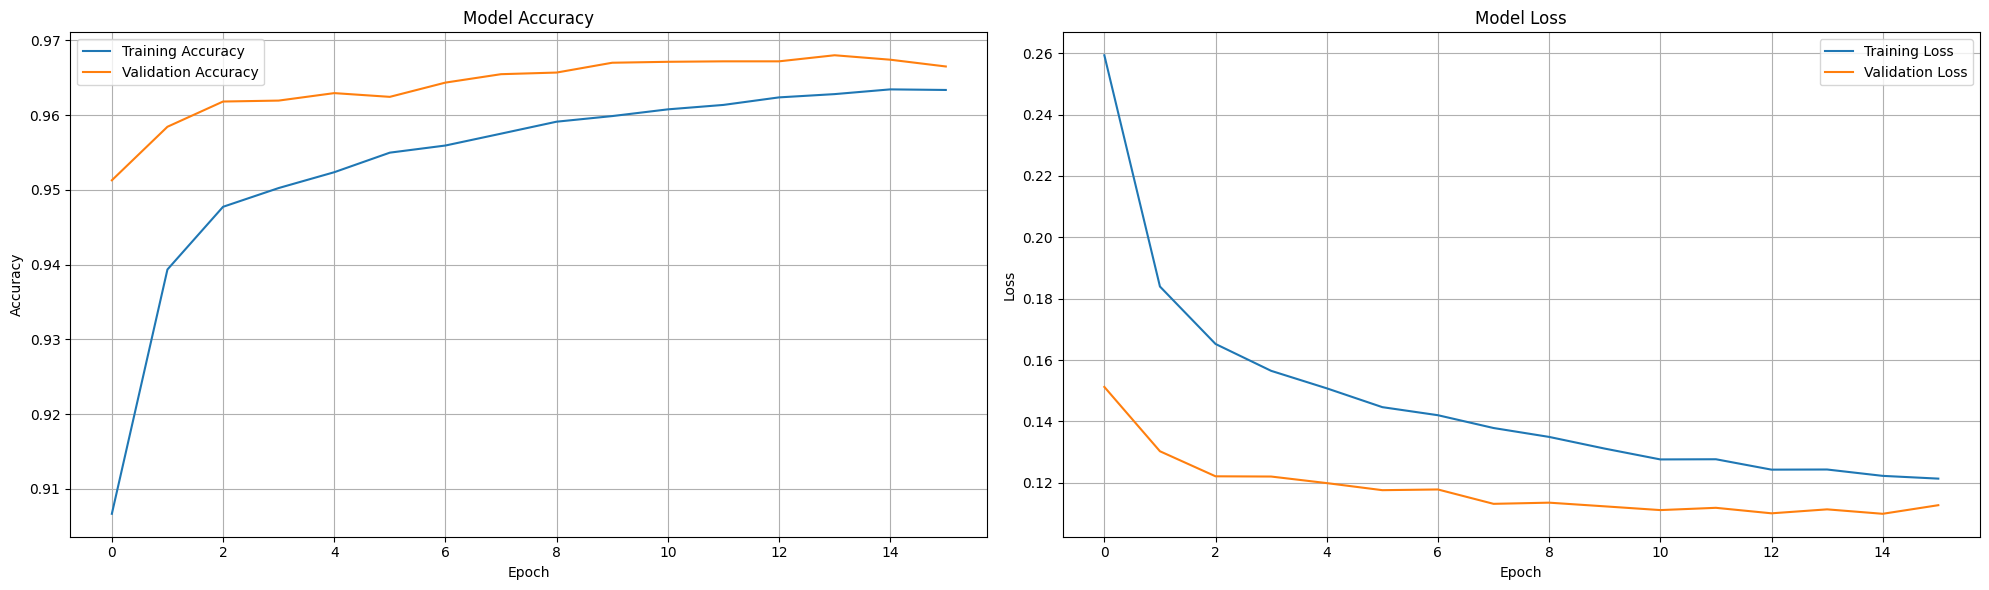

In [34]:
# Buat figure dengan 2 subplot berdampingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot Accuracy di subplot pertama
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss di subplot kedua
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Atur jarak antar subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


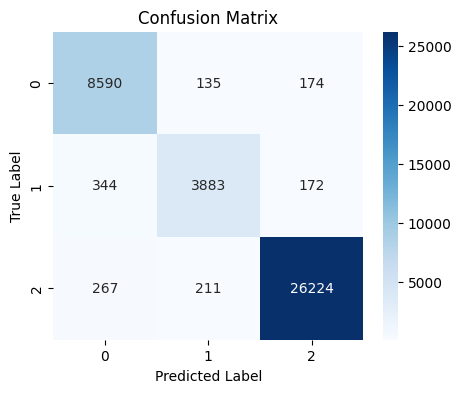

In [35]:
# Prediksi
y_pred = model_rnn.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [36]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes,
                          target_names=['Negative', 'Neutral', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.97      0.95      8899
     Neutral       0.92      0.88      0.90      4399
    Positive       0.99      0.98      0.98     26702

    accuracy                           0.97     40000
   macro avg       0.95      0.94      0.94     40000
weighted avg       0.97      0.97      0.97     40000



1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


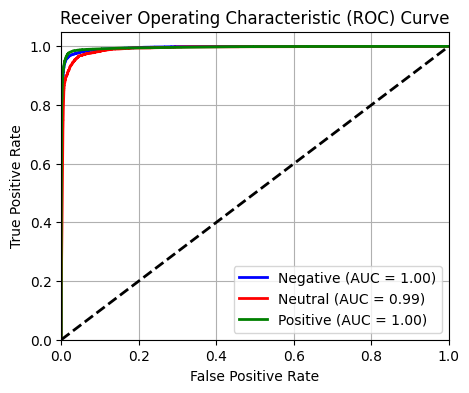


AUC Scores:
Negative: 0.9957
Neutral: 0.9913
Positive: 0.9961


In [37]:
# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba = model_rnn.predict(X_test_reshaped)

# Hitung ROC curve dan AUC untuk setiap kelas
n_classes = y_test_cat.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(5, 4))
colors = ['blue', 'red', 'green']
labels = ['Negative', 'Neutral', 'Positive']

for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores
print("\nAUC Scores:")
for i, label in enumerate(labels):
    print(f"{label}: {roc_auc[i]:.4f}")

# **LSTM**

In [38]:
# Model LSTM
model_lstm = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │       885,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 937,603 (3.58 MB)

 Trainable params: 937,219 (3.58 MB)

 Non-trainable params: 384 (1.50 KB)

In [39]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model_lstm.compile(
    optimizer= optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [40]:
# Early Stopping
Early_Stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

In [41]:
# Training model
history = model_lstm.fit(
    X_train_reshaped,
    y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[Early_Stopping],
    verbose=1
)

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - accuracy: 0.8913 - loss: 0.2973 - val_accuracy: 0.9563 - val_loss: 0.1355
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 37s 9ms/step - accuracy: 0.9507 - loss: 0.1548 - val_accuracy: 0.9618 - val_loss: 0.1271
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9569 - loss: 0.1408 - val_accuracy: 0.9609 - val_loss: 0.1228
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9607 - loss: 0.1262 - val_accuracy: 0.9660 - val_loss: 0.1127
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - accuracy: 0.9616 - loss: 0.1235 - val_accuracy: 0.9657 - val_loss: 0.1133
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 37s 9ms/step - accuracy: 0.9638 - loss: 0.1174 - val_accuracy: 0.9664 - val_loss: 0.1131
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 43s 10ms/step - accuracy: 0.9650 - loss: 0.1147 - val_accuracy: 0.9663 - val_loss: 0.1161
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.9669 - loss: 

In [42]:
# Evaluasi model
test_loss, test_accuracy = model_lstm.evaluate(X_test_reshaped, y_test_cat, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.4f}')


Test accuracy: 0.9678


In [43]:
# Evaluasi model
train_loss, train_accuracy = model_lstm.evaluate(X_train_reshaped, y_train_cat, verbose=0)
test_loss, test_accuracy = model_lstm.evaluate(X_test_reshaped, y_test_cat, verbose=0)

print("Hasil Evaluasi Model:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

Hasil Evaluasi Model:
Training Accuracy: 0.9746
Testing Accuracy: 0.9678
Training Loss: 0.0862
Testing Loss: 0.1098


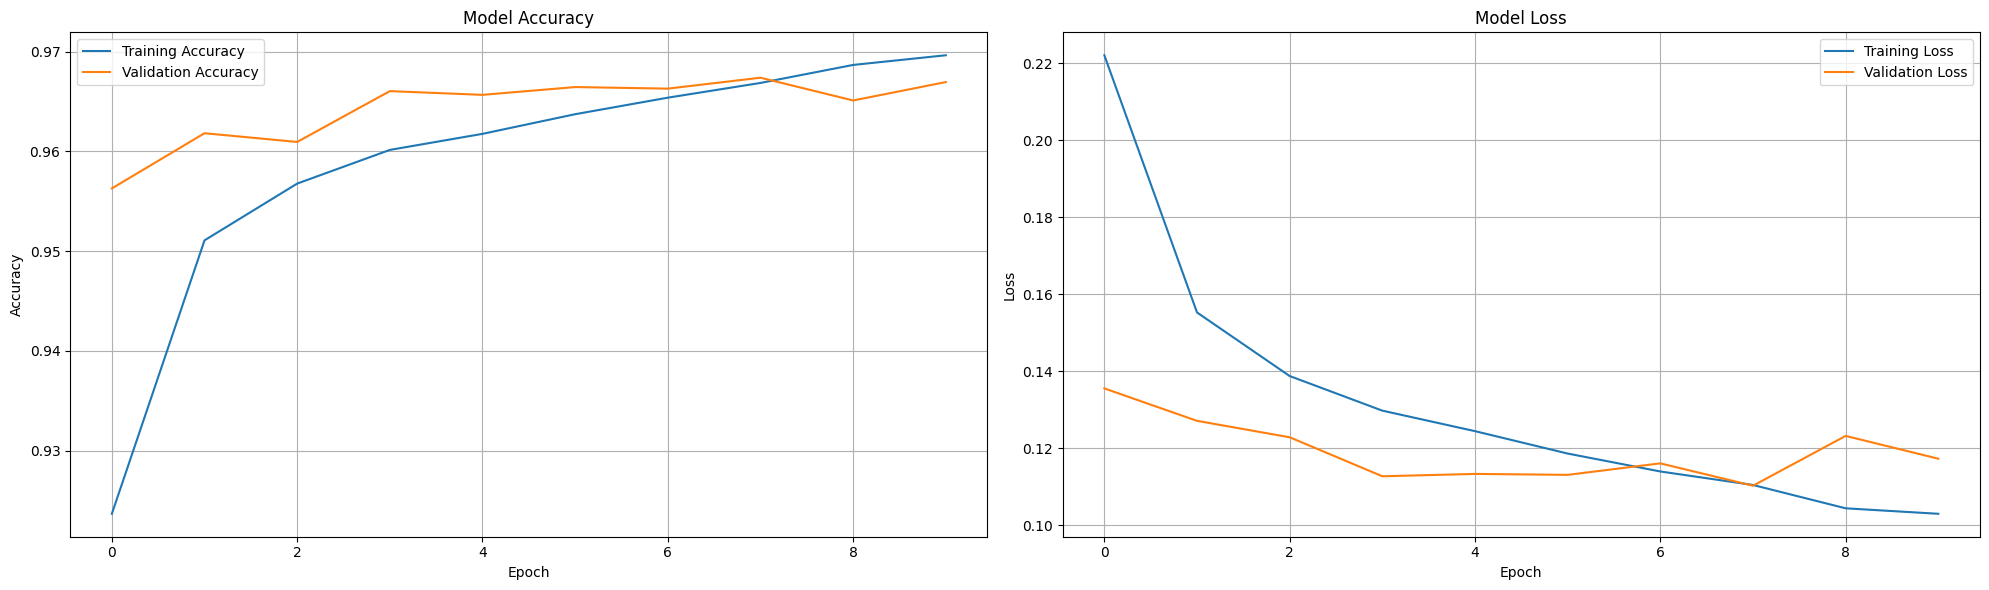

In [44]:
# Buat figure dengan 2 subplot berdampingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot Accuracy di subplot pertama
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss di subplot kedua
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Atur jarak antar subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


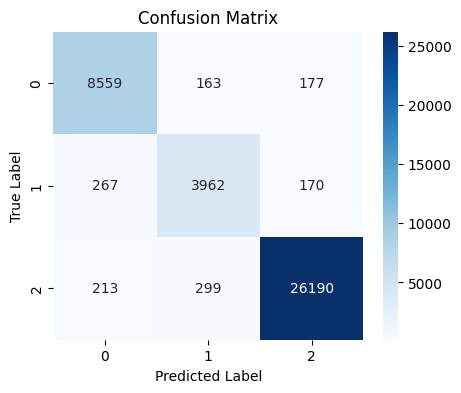

In [45]:
# Prediksi
y_pred = model_lstm.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [46]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes,
                          target_names=['Negative', 'Neutral', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.95      0.96      0.95      8899
     Neutral       0.90      0.90      0.90      4399
    Positive       0.99      0.98      0.98     26702

    accuracy                           0.97     40000
   macro avg       0.94      0.95      0.95     40000
weighted avg       0.97      0.97      0.97     40000



1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


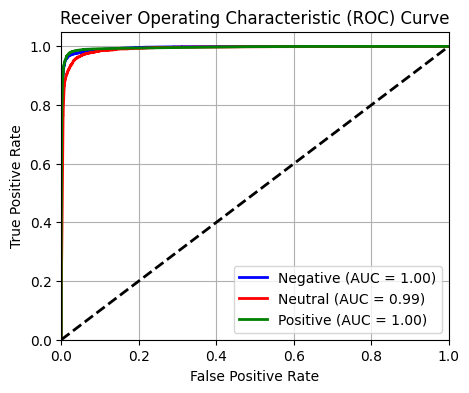


AUC Scores:
Negative: 0.9956
Neutral: 0.9911
Positive: 0.9958


In [47]:
# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba = model_lstm.predict(X_test_reshaped)

# Hitung ROC curve dan AUC untuk setiap kelas
n_classes = y_test_cat.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(5, 4))
colors = ['blue', 'red', 'green']
labels = ['Negative', 'Neutral', 'Positive']

for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores
print("\nAUC Scores:")
for i, label in enumerate(labels):
    print(f"{label}: {roc_auc[i]:.4f}")

# **Bi-LSTM**

In [48]:
# Model BiLSTM
model_BiLSTM = Sequential([
    Bidirectional(LSTM(128, return_sequences=True),
                 input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    BatchNormalization(),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

# Tampilkan ringkasan model
model_BiLSTM.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1, 256)         │     1,770,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,940,611 (7.40 MB)

 Trainable params: 1,939,843 (7.40 MB)

 Non-trainable params: 768 (3.00 KB)

In [49]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model_BiLSTM.compile(
    optimizer= optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [50]:
# Early Stopping
Early_Stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

In [51]:
# Training model
history = model_BiLSTM.fit(
    X_train_reshaped,
    y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[Early_Stopping],
    verbose=1
)

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 56s 13ms/step - accuracy: 0.8949 - loss: 0.2895 - val_accuracy: 0.9548 - val_loss: 0.1389
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - accuracy: 0.9502 - loss: 0.1563 - val_accuracy: 0.9489 - val_loss: 0.1564
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 50s 12ms/step - accuracy: 0.9574 - loss: 0.1371 - val_accuracy: 0.9611 - val_loss: 0.1222
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.9602 - loss: 0.1286 - val_accuracy: 0.9626 - val_loss: 0.1203
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 85s 13ms/step - accuracy: 0.9641 - loss: 0.1189 - val_accuracy: 0.9663 - val_loss: 0.1123
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 80s 13ms/step - accuracy: 0.9656 - loss: 0.1135 - val_accuracy: 0.9641 - val_loss: 0.1191
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 80s 12ms/step - accuracy: 0.9661 - loss: 0.1095 - val_accuracy: 0.9668 - val_loss: 0.1178
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 83s 13ms/step - accuracy: 0.9685 -

In [52]:
# Evaluasi model
test_loss, test_accuracy = model_BiLSTM.evaluate(X_test_reshaped, y_test_cat, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.4f}')


Test accuracy: 0.9683


In [53]:
# Evaluasi model
train_loss, train_accuracy = model_BiLSTM.evaluate(X_train_reshaped, y_train_cat, verbose=0)
test_loss, test_accuracy = model_BiLSTM.evaluate(X_test_reshaped, y_test_cat, verbose=0)

print("Hasil Evaluasi Model:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

Hasil Evaluasi Model:
Training Accuracy: 0.9757
Testing Accuracy: 0.9683
Training Loss: 0.0833
Testing Loss: 0.1141


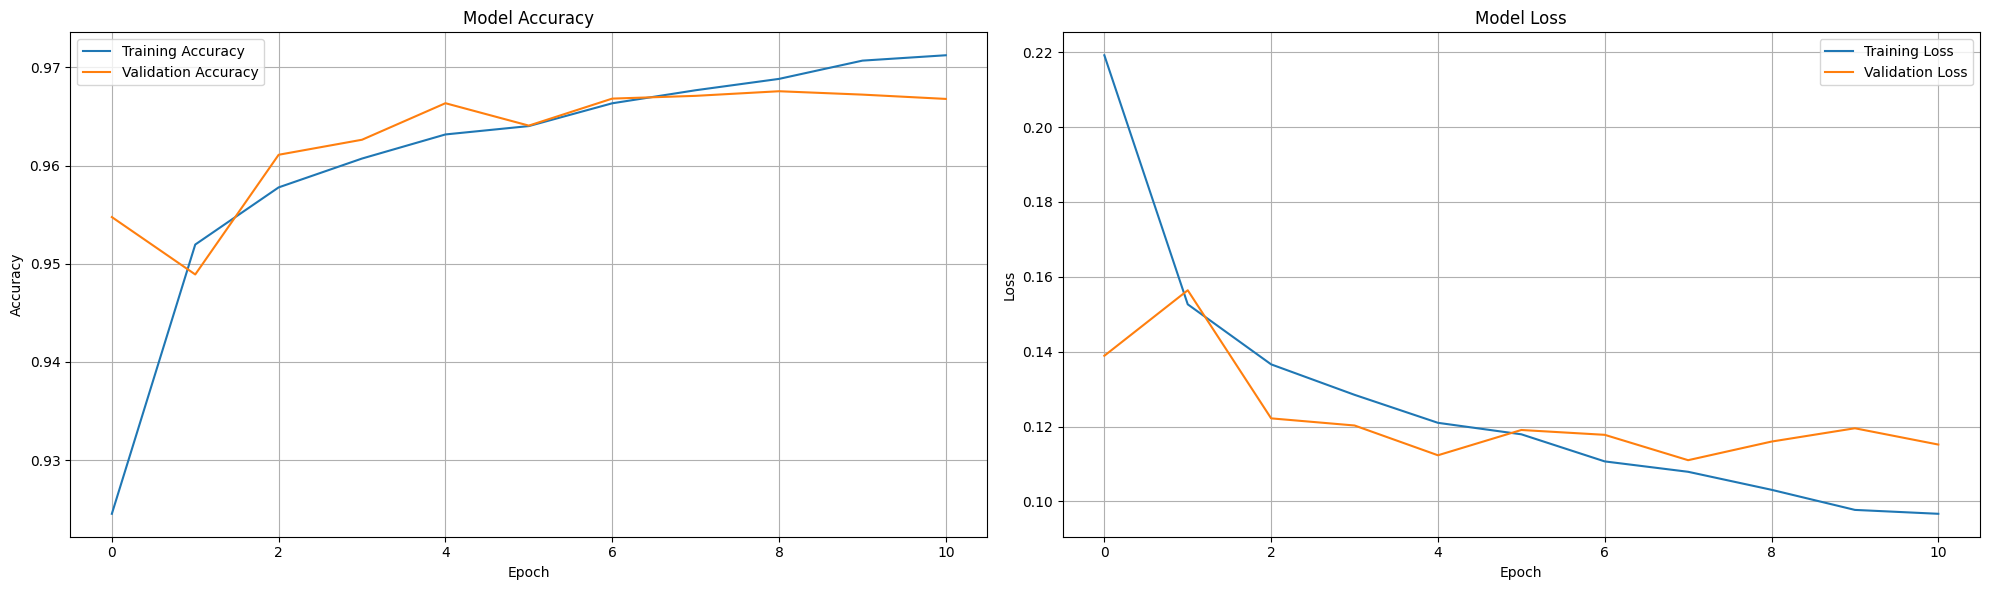

In [54]:
# Buat figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot Accuracy di subplot pertama
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss di subplot kedua
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Atur jarak antar subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


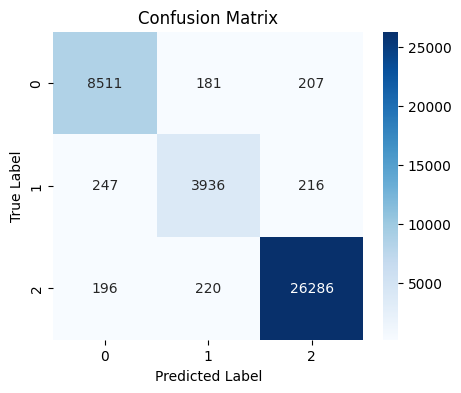

In [55]:
# Prediksi
y_pred = model_BiLSTM.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [56]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes,
                          target_names=['Negative', 'Neutral', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.95      0.96      0.95      8899
     Neutral       0.91      0.89      0.90      4399
    Positive       0.98      0.98      0.98     26702

    accuracy                           0.97     40000
   macro avg       0.95      0.95      0.95     40000
weighted avg       0.97      0.97      0.97     40000



1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


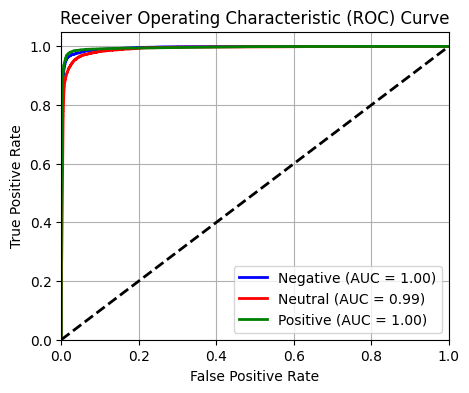


AUC Scores:
Negative: 0.9954
Neutral: 0.9908
Positive: 0.9957


In [57]:
# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba = model_BiLSTM.predict(X_test_reshaped)

# Hitung ROC curve dan AUC untuk setiap kelas
n_classes = y_test_cat.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(5, 4))
colors = ['blue', 'red', 'green']
labels = ['Negative', 'Neutral', 'Positive']

for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores
print("\nAUC Scores:")
for i, label in enumerate(labels):
    print(f"{label}: {roc_auc[i]:.4f}")

# **Deployment**

# **Visualisasi**

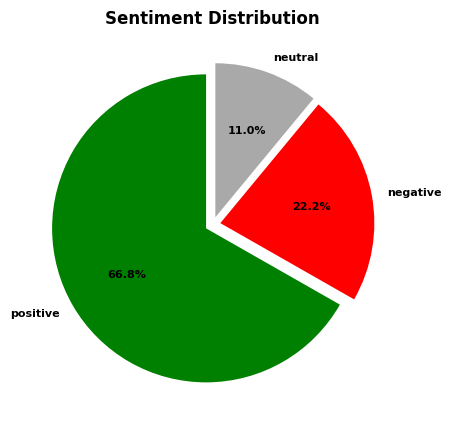

In [58]:
# Data sentiment
sentiment_counts = clean_df['polarity'].value_counts()

# Memberi jarak Chart
explode = [0.05] * len(sentiment_counts)

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#008000', '#FF0000', '#A9A9A9'],
    explode=explode,
    textprops={'fontsize': 8, 'weight': 'bold'}
)
plt.title('Sentiment Distribution', fontsize=12, weight='bold')
plt.show()

<Figure size 1200x600 with 0 Axes>

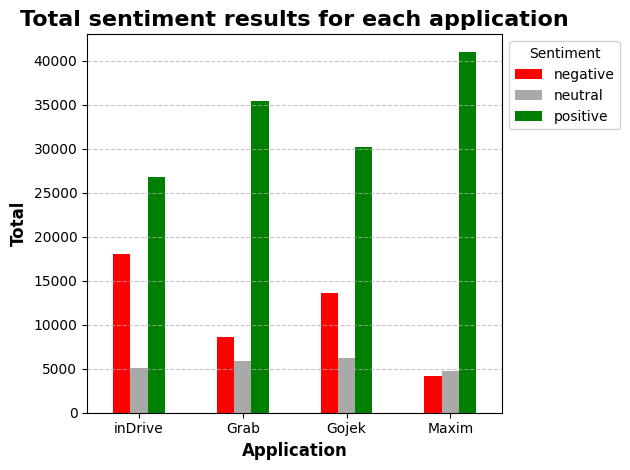

<Figure size 1200x600 with 0 Axes>

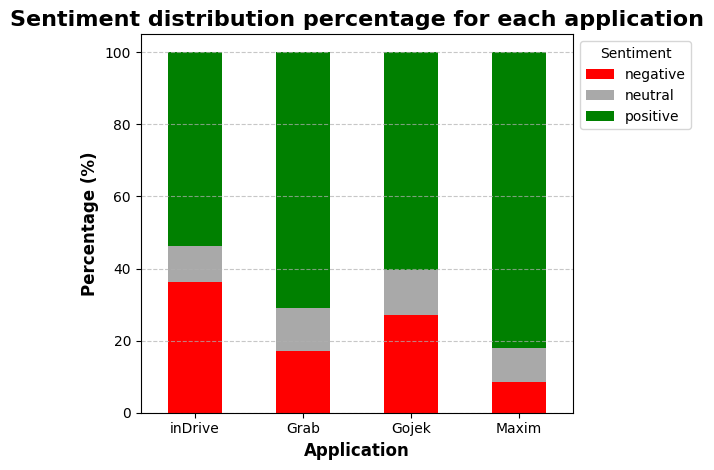

In [59]:
# Data preparation
applications = ['inDrive', 'Grab', 'Gojek', 'Maxim']

# Filter and summarize sentiment counts
summary_data = clean_df.groupby(['appName', 'polarity']).size().unstack(fill_value=0).loc[applications]

# Grafik batang: Jumlah absolut sentimen
plt.figure(figsize=(12, 6))
summary_data.plot(kind='bar', stacked=False, color=['#FF0000', '#A9A9A9', '#008000'])
plt.title('Total sentiment results for each application', fontsize=16, weight='bold')
plt.ylabel('Total', fontsize=12, weight='bold')
plt.xlabel('Application', fontsize=12, weight='bold')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Grafik batang bertumpuk: Persentase distribusi sentimen
summary_percent = (summary_data.T / summary_data.sum(axis=1)).T * 100

plt.figure(figsize=(12, 6))
summary_percent.plot(kind='bar', stacked=True, color=['#FF0000', '#A9A9A9', '#008000'])
plt.title('Sentiment distribution percentage for each application', fontsize=16, weight='bold')
plt.ylabel('Percentage (%)', fontsize=12, weight='bold')
plt.xlabel('Application', fontsize=12, weight='bold')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [60]:
# Tabel ringkasan
summary_data['Total'] = summary_data.sum(axis=1)
summary_percent['Positive (%)'] = summary_percent['positive']
summary_percent['Neutral (%)'] = summary_percent['neutral']
summary_percent['Negative (%)'] = summary_percent['negative']

summary_table = pd.concat([summary_data, summary_percent[['Positive (%)', 'Neutral (%)', 'Negative (%)']]], axis=1)
print(summary_table)

polarity  negative  neutral  positive  Total  Positive (%)  Neutral (%)  \
appName                                                                   
inDrive      18073     5110     26816  49999     53.633073    10.220204   
Grab          8615     5897     35487  49999     70.975420    11.794236   
Gojek        13575     6200     30225  50000     60.450000    12.400000   
Maxim         4232     4788     40980  50000     81.960000     9.576000   

polarity  Negative (%)  
appName                 
inDrive      36.146723  
Grab         17.230345  
Gojek        27.150000  
Maxim         8.464000  


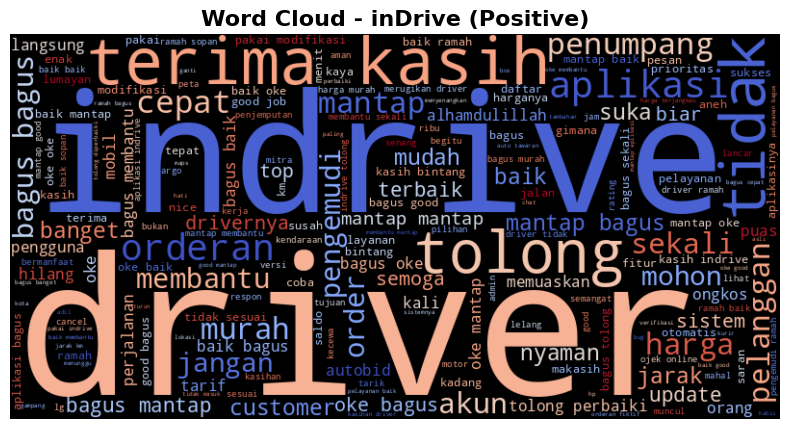

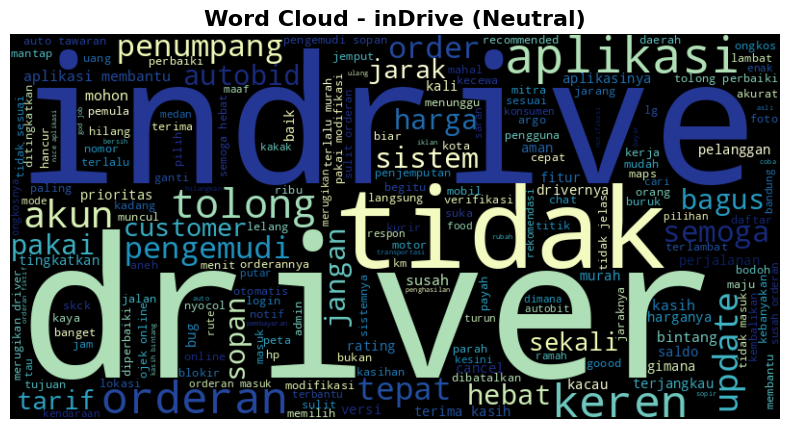

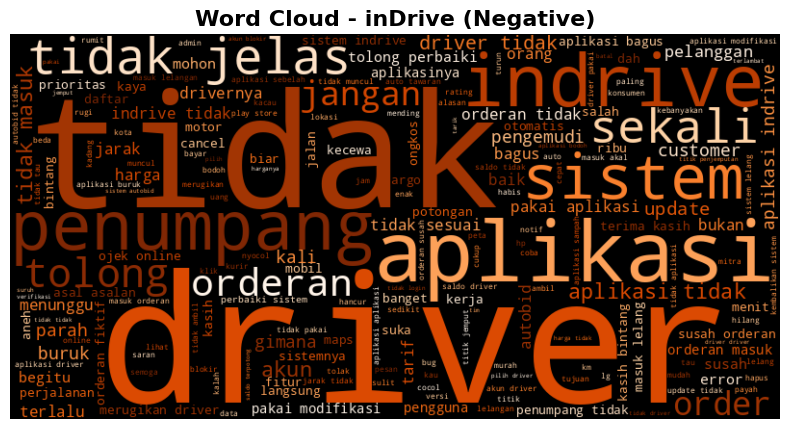

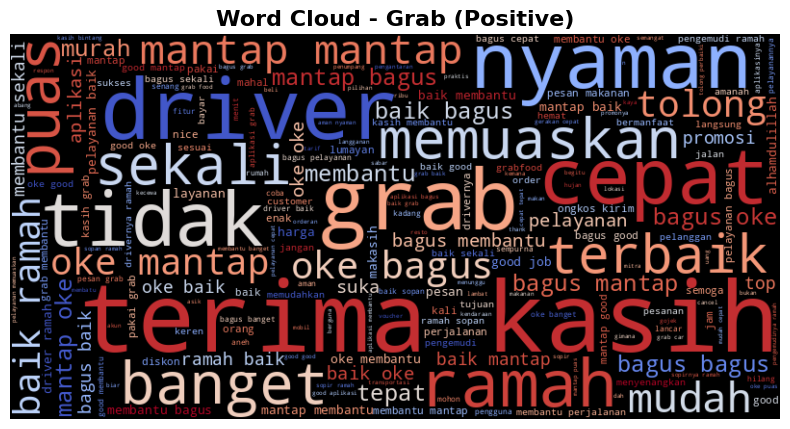

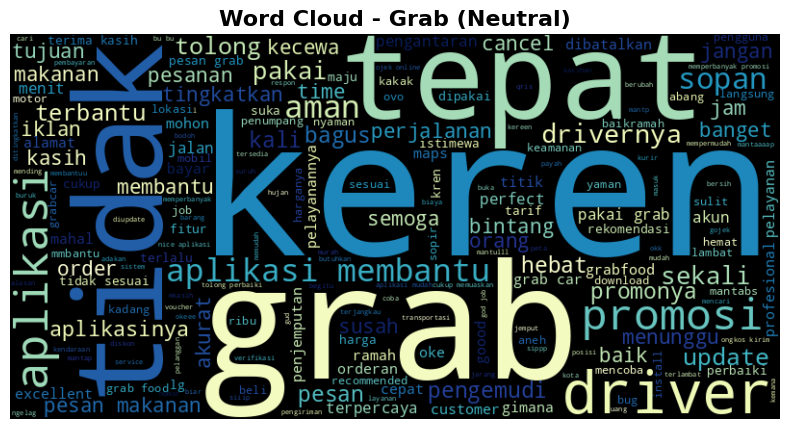

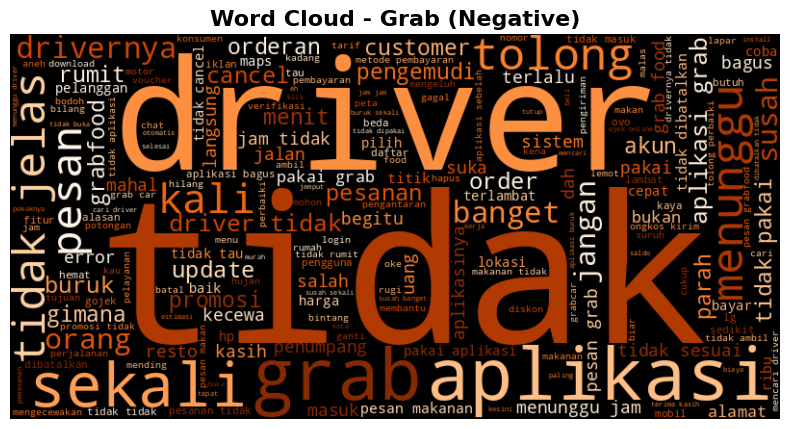

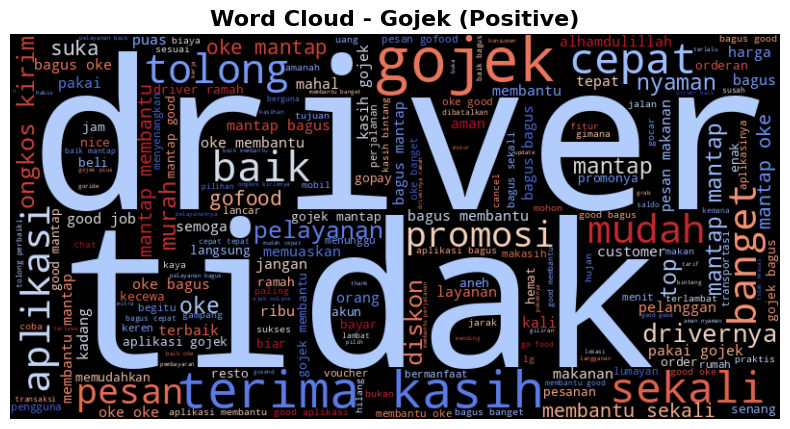

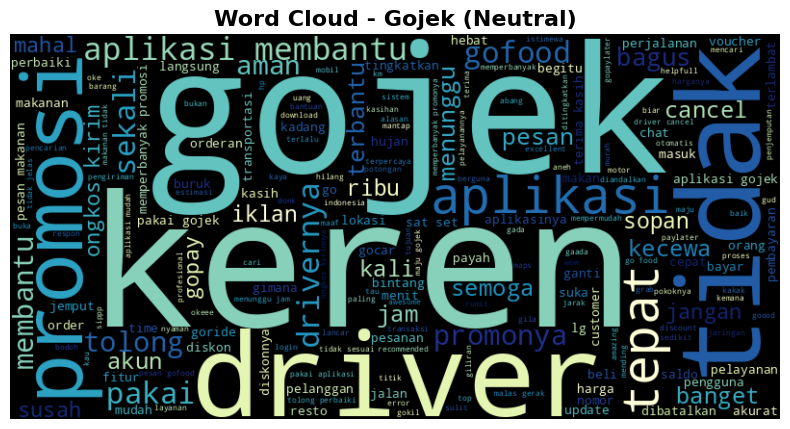

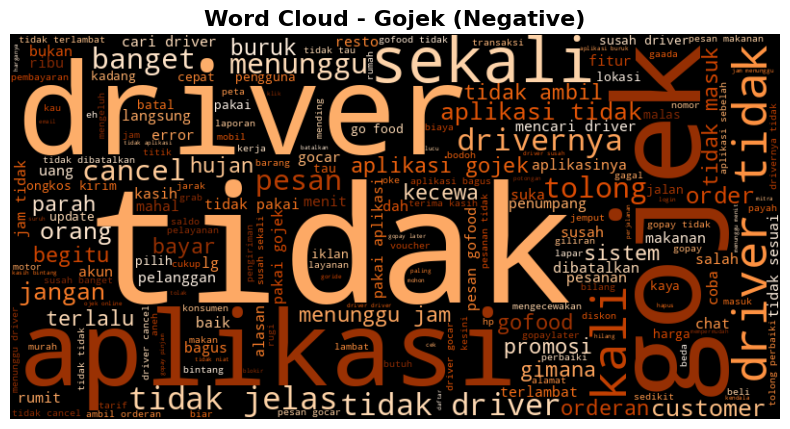

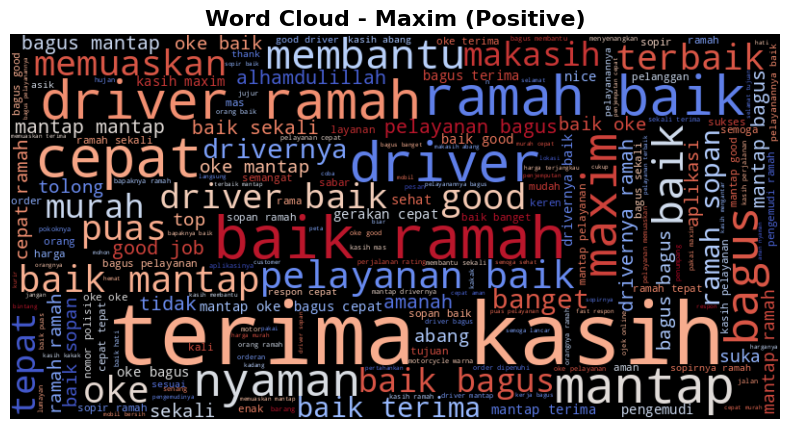

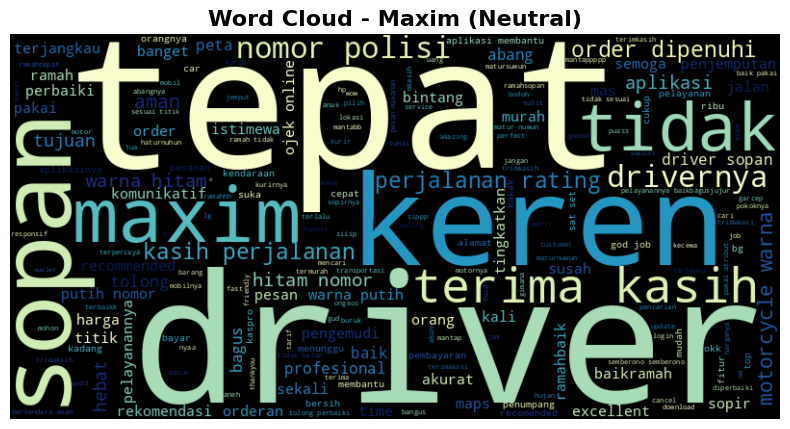

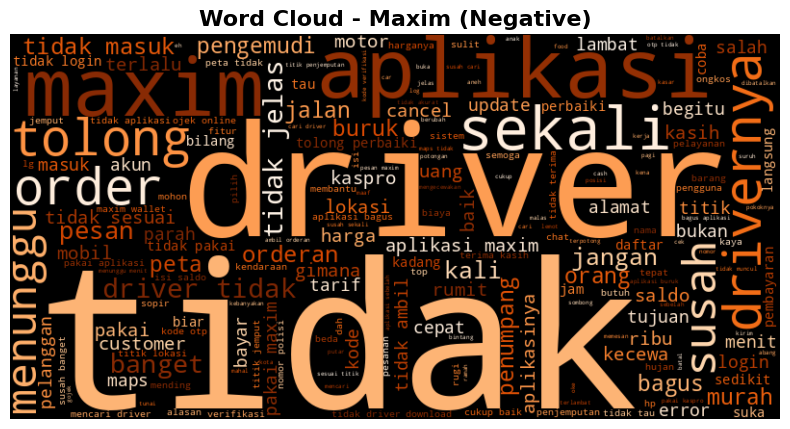

In [61]:
# Visualisasi Word Cloud untuk masing-masing aplikasi dan sentimen
applications = ['inDrive', 'Grab', 'Gojek', 'Maxim']
sentiments = ['positive', 'neutral', 'negative']

for app in applications:
    for sentiment in sentiments:
        # Filter data berdasarkan aplikasi dan sentimen
        app_data = clean_df[(clean_df['appName'] == app) & (clean_df['polarity'] == sentiment)]
        text = ' '.join(app_data['text_final'].astype(str))  # Gabungkan semua teks

        # Buat word cloud
        wordcloud = WordCloud(
            background_color='black',
            colormap='coolwarm' if sentiment == 'positive' else 'YlGnBu' if sentiment == 'neutral' else 'Oranges',
            max_words=200,
            width=800,
            height=400
        ).generate(text)

        # Plot word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud - {app} ({sentiment.capitalize()})', fontsize=16, weight='bold')
        plt.show()